###Source Sheet

In [101]:
import numpy
from potential_utils import *
from matplotlib import pyplot
%matplotlib inline

In [102]:
# define the domain
N = 100                               # Number of points in each direction
x_start, x_end = -1.0, 1.0            # x-direction boundaries
y_start, y_end = -1.5, 1.5            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

In [103]:
u_inf = 1.0     # free-stream speed

# calculates the free-stream velocity components
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

In [104]:
N_sources = 11                                # number of sources
strength = 2.0                                # sum of all source strengths
strength_source = strength/N_sources          # strength of one source
x_source = numpy.zeros(N_sources, dtype=float)   # horizontal position of all sources (1D array)
y_source = numpy.linspace(-1.0, 1.0, N_sources)  # vertical position of all sources (1D array)

# creates a source line (Numpy array of Source's instantiations)
sources = numpy.empty(N_sources, dtype=object)
for i in xrange(N_sources):
    sources[i] = Source(strength_source, x_source[i], y_source[i])
    sources[i].velocity(X, Y)

# superposition of all sources to the free-stream flow
u = u_freestream.copy()
v = v_freestream.copy()
for source in sources:
    u += source.u
    v += source.v

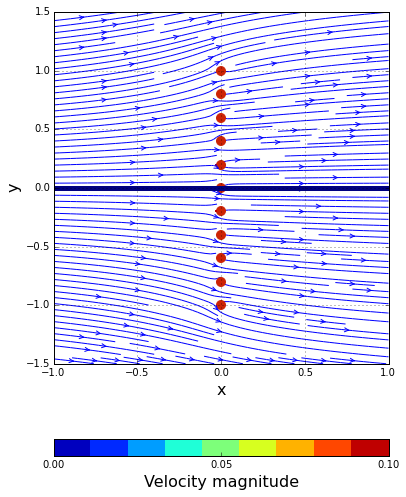

In [105]:
# plots the streamlines
%matplotlib inline

size = 6
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi, levels = [0], linewidths=5)
velocity = pyplot.contourf(X, Y, numpy.sqrt(u**2+v**2), levels=numpy.linspace(0.0, 0.1, 10))
cbar = pyplot.colorbar(velocity, ticks=[0, 0.05, 0.1], orientation='horizontal')
cbar.set_label('Velocity magnitude', fontsize=16)

### Infinite lines of sources


In [70]:
from scipy import integrate

In [71]:
sigma = 2.0   # strength of the source-sheet

# boundaries of the source-sheet
y_min, y_max = -1.0, 1.0

# computes the velcity field generated by the source-sheet
u_sheet = numpy.empty((N, N), dtype=float)
v_sheet = numpy.empty((N, N), dtype=float)
for i in xrange(N):
    for j in xrange(N):  
        integrand = lambda s : X[i,j]/(X[i,j]**2+(Y[i,j]-s)**2)
        u_sheet[i,j] = sigma/(2*math.pi)*integrate.quad(integrand, y_min, y_max)[0]
        
        integrand = lambda s: (Y[i,j]-s)/(X[i,j]**2+(Y[i,j]-s)**2)
        v_sheet[i,j] = sigma/(2*math.pi)*integrate.quad(integrand, y_min, y_max)[0]

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

In [90]:
# find the border
upper =  min(Y[:,N/2], key=lambda x:abs(x-y_max))
lower =  min(Y[:,N/2], key=lambda x:abs(x-y_min))

idx_u = numpy.where(Y[:,N/2] == upper)
idx_l = numpy.where(Y[:,N/2] == lower)
div_levels = [psi[idx_u, N/2], psi[idx_l, N/2]]

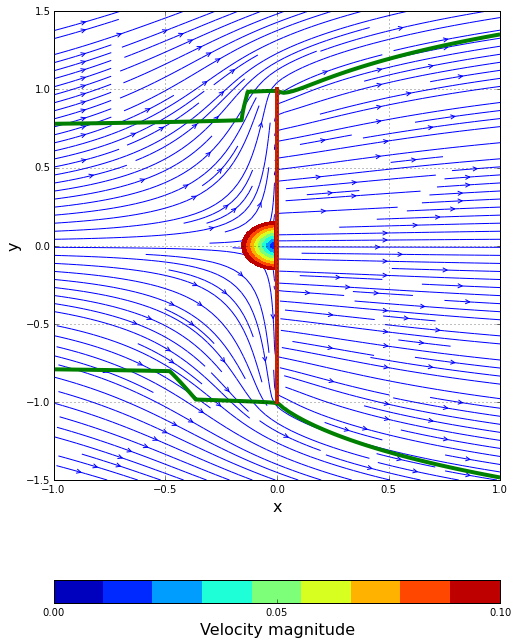

In [95]:
# plots the streamlines
%matplotlib inline

size = 8
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.axvline(0.0, (y_min-y_start)/(y_end-y_start), (y_max-y_start)/(y_end-y_start), 
            color='#CD2305', linewidth=4)
velocity = pyplot.contourf(X, Y, numpy.sqrt(u**2+v**2), levels=numpy.linspace(0.0, 0.1, 10))
cbar = pyplot.colorbar(velocity, ticks=[0, 0.05, 0.1], orientation='horizontal')
cbar.set_label('Velocity magnitude', fontsize=16)
pyplot.contour(X,Y,psi, levels = div_levels, colors=['g','g'], linewidths=4);